In [1]:
from IPython.core.display import display, HTML
display(HTML("""<style>.container { width:100% !important;} 
                *{font-family:'Consolas'; font-size:14;} .cm-s-ipython span.cm-comment 
                {color: #87CEFA; font-style: italic;}</style>"""))

In [3]:
import tensorflow as tf

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
weather = pd.read_csv("Data-Results/plant11_data.csv")

In [6]:
weather

,mea_ddhr,cond_24hr,tem_in_loc,hum_in_loc,tem_coil_loc,tem_out_loc,hum_out_loc,cond_loc1,tem_in_loc_24hr,hum_in_loc_24hr,...,rain_t_3_24hr,asos_tem,asos_rain,asos_wind_d,asos_wind_s,asos_spot_pr,asos_sea_pr,asos_hum,asos_sun,asos_sun_time
0,2016-04-01 03:00:00,0,14.00,28.00,10.00,7.00,59.00,0,14.00,41.00,...,0.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.00,0.0
1,2016-04-01 06:00:00,0,13.00,33.00,10.00,6.00,56.00,0,13.00,38.00,...,0.0,3.7,0.0,76.0,0.4,1011.9,1015.5,66.2,0.00,0.0
2,2016-04-01 09:00:00,0,13.00,33.00,10.00,18.00,30.00,0,14.00,41.00,...,0.0,12.9,0.0,294.2,0.7,1013.2,1016.7,41.2,1.39,6960.0
3,2016-04-01 12:00:00,0,16.00,28.00,10.00,18.00,20.00,0,17.00,35.00,...,0.0,20.5,0.0,212.9,2.4,1012.4,1015.8,24.1,7.05,17760.0
4,2016-04-01 15:00:00,0,18.00,24.00,14.00,17.00,23.00,0,19.00,32.00,...,0.0,21.3,0.0,273.6,3.6,1011.6,1015.0,22.9,13.48,28560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57183,2019-03-29 23:10:00,0,12.99,47.37,12.58,8.23,60.78,0,13.17,45.57,...,0.0,6.3,0.0,344.3,1.0,1011.8,1015.0,65.2,22.36,35100.0
57184,2019-03-29 23:20:00,0,13.08,48.02,12.69,8.17,62.61,0,13.17,45.57,...,0.0,6.3,0.0,340.4,2.6,1011.8,1015.0,66.0,22.36,35100.0
57185,2019-03-29 23:30:00,0,13.17,48.63,12.66,8.14,62.42,0,13.17,45.57,...,0.0,6.3,0.0,337.1,2.2,1011.8,1015.0,65.0,22.36,35100.0
57186,2019-03-29 23:40:00,0,13.08,48.87,12.73,7.92,61.17,0,13.17,45.57,...,0.0,6.3,0.0,351.2,1.4,1011.8,1015.0,65.2,22.36,35100.0


In [8]:
weather.dropna(axis=0, inplace=True)

In [9]:
weather.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
# weather.head()

In [ ]:
weather = weather.interpolate(method='values')

In [10]:
weather.isnull().sum()

plant1_train.mea_ddhr         0
plant1_train.tem_in_loc1      0
plant1_train.hum_in_loc1      0
plant1_train.tem_coil_loc1    0
plant1_train.tem_in_loc2      0
plant1_train.hum_in_loc2      0
plant1_train.tem_coil_loc2    0
plant1_train.tem_in_loc3      0
plant1_train.hum_in_loc3      0
plant1_train.tem_coil_loc3    0
plant1_train.tem_out_loc1     0
plant1_train.hum_out_loc1     0
plant1_train.cond_loc1        0
plant1_train.cond_loc2        0
plant1_train.cond_loc3        0
dew_point_1                   0
dew_point_2                   0
dew_point_3                   0
dtype: int64

In [11]:
weather = weather.drop(['plant1_train.tem_in_loc2',
       'plant1_train.hum_in_loc2', 'plant1_train.tem_coil_loc2',
       'plant1_train.tem_in_loc3', 'plant1_train.hum_in_loc3',
       'plant1_train.tem_coil_loc3', 'plant1_train.cond_loc1',
       'plant1_train.cond_loc2', 'plant1_train.cond_loc3', 'dew_point_2',
       'dew_point_3'], axis=1)

In [7]:
def univariate_data(dataset, start_index, end_index, 
                    history_size, target_size):
    data = []
    labels = []
    
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size
        
    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

In [20]:
TRAIN_SPLIT = 30000
#tf.random.set_random_seed(13) # 집에서
#tf.random.set_seed(13)

In [14]:
uni_data = weather['plant1_train.hum_in_loc1']
uni_data.index = weather['plant1_train.mea_ddhr']
uni_data.head()

plant1_train.mea_ddhr
2016-04-01 0:00     24.0
2016-04-01 3:00     28.0
2016-04-01 6:00     33.0
2016-04-01 9:00     33.0
2016-04-01 12:00    28.0
Name: plant1_train.hum_in_loc1, dtype: float64

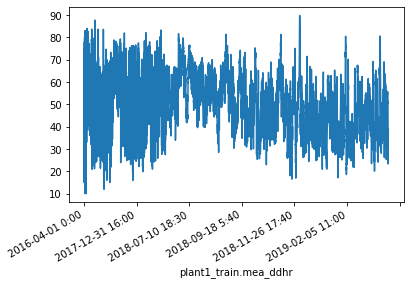

In [15]:
uni_data.plot(subplots=True)
plt.show()

In [16]:
uni_data = uni_data.values

In [17]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

uni_data = (uni_data - uni_train_mean)/uni_train_std

In [18]:
uni_data

array([-2.52628752, -2.19827641, -1.78826254, ..., -1.44549094,
       -1.37824866, -1.31756661])

In [19]:
univariate_past_history = 24
univariate_future_target = 24

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)

x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [20]:
x_train_uni.shape, y_train_uni.shape, x_val_uni.shape, y_val_uni.shape

((29976, 24, 1), (29976,), (27806, 24, 1), (27806,))

In [21]:
x_train_uni

array([[[-2.52628752],
        [-2.19827641],
        [-1.78826254],
        ...,
        [ 0.42581239],
        [-0.39421536],
        [-0.23020981]],

       [[-2.19827641],
        [-1.78826254],
        [-1.78826254],
        ...,
        [-0.39421536],
        [-0.23020981],
        [-2.19827641]],

       [[-1.78826254],
        [-1.78826254],
        [-2.19827641],
        ...,
        [-0.23020981],
        [-2.19827641],
        [-2.03427086]],

       ...,

       [[-0.21380925],
        [-0.22364959],
        [-0.17362789],
        ...,
        [ 0.13388251],
        [ 0.12896235],
        [ 0.15684329]],

       [[-0.22364959],
        [-0.17362789],
        [-0.15394723],
        ...,
        [ 0.12896235],
        [ 0.15684329],
        [ 0.17898404]],

       [[-0.17362789],
        [-0.15394723],
        [-0.1236062 ],
        ...,
        [ 0.15684329],
        [ 0.17898404],
        [ 0.2044049 ]]])

In [22]:
print('Single window of past history')
print(x_train_uni[0])
print('\n Target temperature to predict')
print(y_train_uni[0])

Single window of past history
[[-2.52628752]
 [-2.19827641]
 [-1.78826254]
 [-1.78826254]
 [-2.19827641]
 [-2.52628752]
 [-2.19827641]
 [-1.37824866]
 [-1.13224034]
 [-1.13224034]
 [-1.37824866]
 [-1.13224034]
 [-1.62425699]
 [-1.87026531]
 [-1.21424311]
 [-0.47621813]
 [-0.06620426]
 [ 0.26180684]
 [ 0.42581239]
 [ 0.7538235 ]
 [ 0.50781517]
 [ 0.42581239]
 [-0.39421536]
 [-0.23020981]]

 Target temperature to predict
0.6718207203702294


In [8]:
def create_time_steps(length):
    return list(range(-length, 0))

In [9]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    
    if delta:
        future = delta
    else:
        future = 0
        
    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,
                     label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], 
                     label=labels[i])
    
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

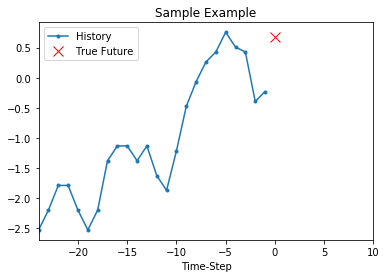

In [25]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')
plt.show()

In [26]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [27]:
x_train_uni.shape

(29976, 24, 1)

In [28]:
y_train_uni.shape

(29976,)

In [29]:
# x_train_uni = x_train_uni.reshape(x_train_uni.shape[0], 1, x_train_uni.shape[1])

In [30]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mean_squared_error')                        

In [31]:
EVALUATION_INTERVAL = 200
EPOCHS = 20

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, 
                      validation_steps=50)

Epoch 1/20
200/200 [==============================] - 19s 93ms/step - loss: 0.7487 - val_loss: 0.6089
Epoch 2/20
200/200 [==============================] - 9s 44ms/step - loss: 0.6610 - val_loss: 0.5287
Epoch 3/20
200/200 [==============================] - 9s 47ms/step - loss: 0.5847 - val_loss: 0.4918
Epoch 4/20
200/200 [==============================] - 11s 54ms/step - loss: 0.6312 - val_loss: 0.4872
Epoch 5/20
200/200 [==============================] - 9s 43ms/step - loss: 0.6448 - val_loss: 0.4969
Epoch 6/20
200/200 [==============================] - 8s 41ms/step - loss: 0.5830 - val_loss: 0.5466
Epoch 7/20
200/200 [==============================] - 8s 41ms/step - loss: 0.5736 - val_loss: 0.4911
Epoch 8/20
200/200 [==============================] - 8s 41ms/step - loss: 0.6144 - val_loss: 0.5016
Epoch 9/20
200/200 [==============================] - 9s 43ms/step - loss: 0.5716 - val_loss: 0.5412
Epoch 10/20
200/200 [==============================] - 10s 50ms/step - loss: 0.5286 - val

In [36]:
for x, y in val_univariate.take(10):
    plot = show_plot([x[0].numpy(), y[0].numpy(),
                      simple_lstm_model.predict(x)[0]], 0, 
                     'Simple LSTM model')
    plot.show()

NameError: name 'val_univariate' is not defined

In [33]:
simple_lstm_model.predict(x_val_uni)

array([[ 0.6140087 ],
       [ 0.6056301 ],
       [ 0.5912783 ],
       ...,
       [-0.6113035 ],
       [-0.60525274],
       [-0.61690974]], dtype=float32)

## Multivariate 시계열 예측

In [66]:
weather.head()

,mea_ddhr,cond_24hr,tem_in_loc,hum_in_loc,tem_coil_loc,tem_out_loc,hum_out_loc,cond_loc1,tem_in_loc_24hr,hum_in_loc_24hr,...,rain_t_3_24hr,asos_tem,asos_rain,asos_wind_d,asos_wind_s,asos_spot_pr,asos_sea_pr,asos_hum,asos_sun,asos_sun_time
0,2016-04-01 03:00:00,0,14.0,28.0,10.0,7.0,59.0,0,14.0,41.0,...,0.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.00,0.0
1,2016-04-01 06:00:00,0,13.0,33.0,10.0,6.0,56.0,0,13.0,38.0,...,0.0,3.7,0.0,76.0,0.4,1011.9,1015.5,66.2,0.00,0.0
2,2016-04-01 09:00:00,0,13.0,33.0,10.0,18.0,30.0,0,14.0,41.0,...,0.0,12.9,0.0,294.2,0.7,1013.2,1016.7,41.2,1.39,6960.0
3,2016-04-01 12:00:00,0,16.0,28.0,10.0,18.0,20.0,0,17.0,35.0,...,0.0,20.5,0.0,212.9,2.4,1012.4,1015.8,24.1,7.05,17760.0
4,2016-04-01 15:00:00,0,18.0,24.0,14.0,17.0,23.0,0,19.0,32.0,...,0.0,21.3,0.0,273.6,3.6,1011.6,1015.0,22.9,13.48,28560.0


In [67]:
weather.columns

Index(['mea_ddhr', 'cond_24hr', 'tem_in_loc', 'hum_in_loc', 'tem_coil_loc',
       'tem_out_loc', 'hum_out_loc', 'cond_loc1', 'tem_in_loc_24hr',
       'hum_in_loc_24hr', 'tem_coil_loc_24hr', 'year', 'month', 'day', 'hour',
       'week_1', 'week_2', 'week_3', 'week_4', 'week_5', 'week_6', 'week_7',
       'week_8', 'week_9', 'week_10', 'week_11', 'week_12', 'week_13',
       'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19',
       'week_20', 'week_21', 'week_22', 'week_23', 'week_24', 'week_25',
       'week_26', 'week_27', 'week_28', 'week_29', 'week_30', 'week_31',
       'week_32', 'week_33', 'week_34', 'week_35', 'week_36', 'week_37',
       'week_38', 'week_39', 'week_40', 'week_41', 'week_42', 'week_43',
       'week_44', 'week_45', 'week_46', 'week_47', 'week_48', 'week_49',
       'week_50', 'week_51', 'week_52', 'dj_aws_tem', 'dj_aws_wind_d',
       'dj_aws_wind_s', 'dj_aws_hum', 'sp_aws_tem', 'sp_aws_wind_d',
       'sp_aws_wind_s', 'sp_aws_spot_pr', 'sp_aws_

In [68]:
tems =['tem_in_loc', 'tem_out_loc', 'dj_aws_tem', 'sp_aws_tem', 'tem_24hr', 'asos_tem']
hums = ['hum_in_loc', 'hum_out_loc', 'dj_aws_hum', 'hum_24hr', 'asos_hum']
winds = ['dj_aws_wind_s', 'sp_aws_wind_s', 'wind_s_24hr', 'asos_wind_s'] #wind_d 도 있긴 한데 일단 뺐음(24시간뒤 값이랑 sp값 있음)
sky = ['sky_1_24hr', 'sky_2_24hr', 'sky_3_24hr', 'sky_4_24hr']
rain = ['rain_p_24hr', 'rain_t_0_24hr', 'rain_t_1_24hr', 'rain_t_2_24hr', 'rain_t_3_24hr', 'asos_rain']
pr = ['sp_aws_sea_pr', 'asos_sea_pr', 'sp_aws_spot_pr', 'asos_spot_pr'] 
sun = ['asos_sun', 'asos_sum_time']

In [69]:
features_considered = ['hum_in_loc_24hr'] + hums + tems + pr + ['rain_p_24hr']

In [70]:
features = weather[features_considered]
features.index = weather["mea_ddhr"]
features.head()

,hum_in_loc_24hr,hum_in_loc,hum_out_loc,dj_aws_hum,hum_24hr,asos_hum,tem_in_loc,tem_out_loc,dj_aws_tem,sp_aws_tem,tem_24hr,asos_tem,sp_aws_sea_pr,asos_sea_pr,sp_aws_spot_pr,asos_spot_pr,rain_p_24hr
mea_ddhr,,,,,,,,,,,,,,,,,
2016-04-01 03:00:00,41.0,28.0,59.0,52.1,42.0,40.3,14.0,7.0,5.2,4.7,20.000000,7.5,1014.9,1014.9,1012.2,1011.4,10.0
2016-04-01 06:00:00,38.0,33.0,56.0,40.9,37.0,66.2,13.0,6.0,6.8,3.5,20.700001,3.7,1015.1,1015.5,1012.4,1011.9,20.0
2016-04-01 09:00:00,41.0,33.0,30.0,28.9,40.0,41.2,13.0,18.0,13.9,12.2,17.500000,12.9,1016.7,1016.7,1014.0,1013.2,20.0
2016-04-01 12:00:00,35.0,28.0,20.0,17.7,59.0,24.1,16.0,18.0,20.4,20.1,13.300000,20.5,1015.6,1015.8,1013.0,1012.4,20.0
2016-04-01 15:00:00,32.0,24.0,23.0,20.1,80.0,22.9,18.0,17.0,19.8,21.1,9.800000,21.3,1014.6,1015.0,1012.0,1011.6,20.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000006E1B85C8>,
      dtype=object)

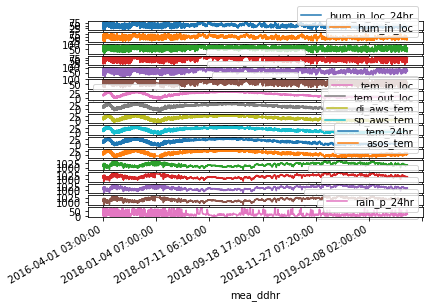

In [71]:
features.plot(subplots=True)

In [72]:
dataset = features.values
data_mean = dataset[10000:].mean(axis=0)
data_std = dataset[10000:].std(axis=0)

In [73]:
dataset = (dataset-data_mean)/data_std

In [74]:
dataset

array([[-0.72430667, -1.75180871, -0.07457214, ..., -0.36987844,
        -0.40177216, -0.42468128],
       [-0.96272744, -1.35555355, -0.2538996 , ..., -0.34709522,
        -0.34481824,  0.16686638],
       [-0.72430667, -1.35555355, -1.80807088, ..., -0.16482949,
        -0.19673805,  0.16686638],
       ...,
       [-0.36111236, -0.1168599 ,  0.12986115, ..., -0.33570361,
        -0.35620902,  0.16686638],
       [-0.36111236, -0.09783966,  0.05514138, ..., -0.34709522,
        -0.35620902,  0.16686638],
       [-0.36111236, -0.13429513, -0.00284116, ..., -0.33570361,
        -0.32203667,  0.16686638]])

In [75]:
def multivariate_data(dataset, target, start_index, end_index,
                      history_size,target_size, step,
                      single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [76]:
dataset

array([[-0.72430667, -1.75180871, -0.07457214, ..., -0.36987844,
        -0.40177216, -0.42468128],
       [-0.96272744, -1.35555355, -0.2538996 , ..., -0.34709522,
        -0.34481824,  0.16686638],
       [-0.72430667, -1.35555355, -1.80807088, ..., -0.16482949,
        -0.19673805,  0.16686638],
       ...,
       [-0.36111236, -0.1168599 ,  0.12986115, ..., -0.33570361,
        -0.35620902,  0.16686638],
       [-0.36111236, -0.09783966,  0.05514138, ..., -0.34709522,
        -0.35620902,  0.16686638],
       [-0.36111236, -0.13429513, -0.00284116, ..., -0.33570361,
        -0.32203667,  0.16686638]])

In [77]:
TRAIN_SPLIT = 30000

In [78]:
past_history = 240
future_target = 24
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 0], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 0],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [79]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (240, 17)


In [80]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

In [81]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [82]:
x_train_single.shape, y_train_single.shape

((29760, 240, 17), (29760,))

In [83]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mean_squared_error')

In [84]:
for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)

(256, 1)


In [85]:
EVALUATION_INTERVAL = 200
EPOCHS = 5

In [86]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/5
200/200 [==============================] - 514s 3s/step - loss: 0.4319 - val_loss: 0.5597
Epoch 2/5
200/200 [==============================] - 532s 3s/step - loss: 0.3468 - val_loss: 0.7184
Epoch 3/5
200/200 [==============================] - 536s 3s/step - loss: 0.2779 - val_loss: 0.8194
Epoch 4/5
200/200 [==============================] - 537s 3s/step - loss: 0.2552 - val_loss: 0.9142
Epoch 5/5
200/200 [==============================] - 50776s 254s/step - loss: 0.2485 - val_loss: 1.0973


In [90]:
single_step_model

In [87]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

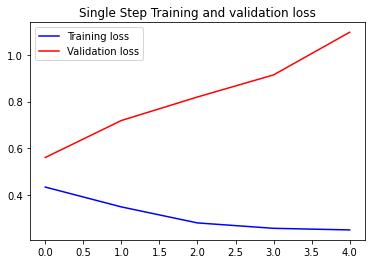

In [88]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

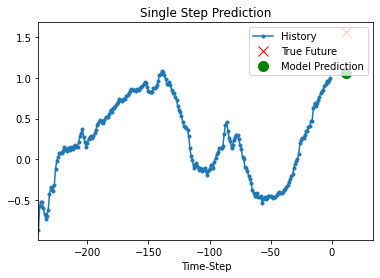

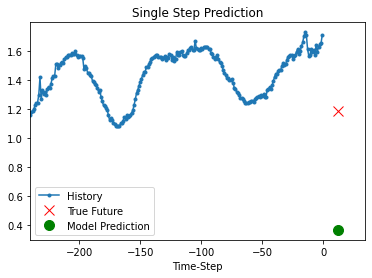

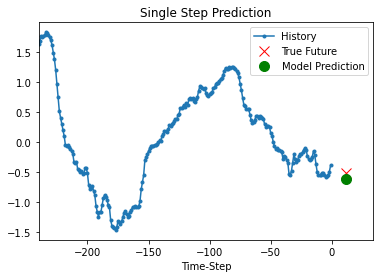

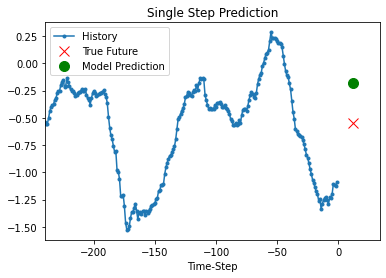

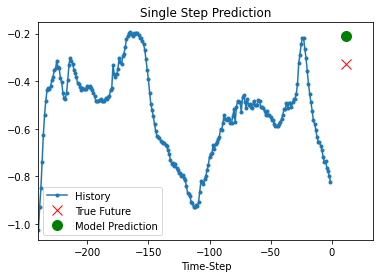

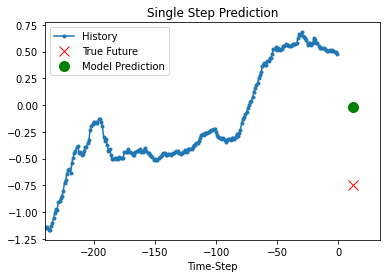

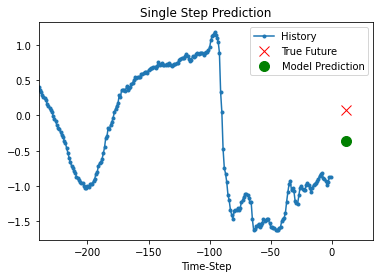

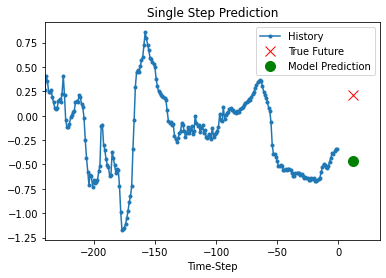

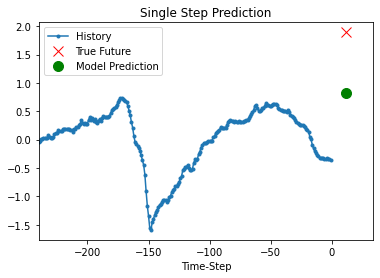

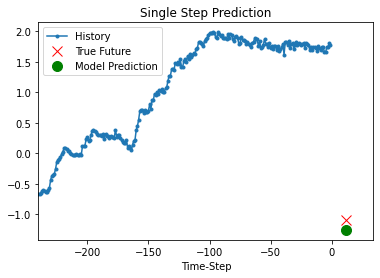

In [89]:
for x, y in val_data_single.take(10):
    plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
    plot.show()